Predicting stock prices with neural networks

In [1]:
pip install pandas


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
import pandas as pd
mydata = pd.read_csv('../deeplearning_project/19880301_20191231.csv',index_col = 'Date')

In [77]:
mydata

,Open,High,Low,Close,Volume
Date,,,,,
1988-03-01,2071.60,2086.90,2048.60,2070.50,23629436
1988-03-02,2070.50,2094.50,2058.20,2071.30,19923259
1988-03-03,2071.30,2085.40,2048.40,2063.50,18375000
1988-03-04,2063.50,2076.80,2033.50,2057.90,16657983
1988-03-07,2057.90,2069.30,2034.20,2056.40,14094676
...,...,...,...,...,...
2019-12-24,28572.57,28576.80,28503.21,28515.45,86151979
2019-12-26,28539.46,28624.10,28535.15,28621.39,156025977
2019-12-27,28675.34,28701.66,28608.98,28645.26,182181663


we implement feature generation , generating features is to extract more relevant information from the historical price and performance data of a stock or index. That identify the patterns, trends, and relationships that can be used to make more accurate predictions about future price movements.

In [6]:
def add_original_feature(df, df_new):
  df_new['open'] = df['Open']
  df_new['open_1'] = df['Open'].shift(1)
  df_new['close_1'] = df['Close'].shift(1)
  df_new['high_1'] = df['High'].shift(1)
  df_new['low_1'] = df['Low'].shift (1)
  df_new['volume_1'] = df[ 'Volume'].shift(1)

generates six features related to average close prices

In [7]:
def add_avg_price(df, df_new):
  df_new['avg_price_5'] = df['Close'].rolling (5).mean().shift (1)
  df_new['avg_price_30'] = df['Close'].rolling (21).mean().shift(1)
  df_new['avg_price_365'] = df['Close'].rolling (252).mean().shift(1)
  df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30'] 
  df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
  df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']

generates six features related to average volumes

In [8]:
def add_avg_volume (df, df_new):
  df_new['avg_volume_5'] = df[ 'Volume'].rolling (5).mean().shift(1)
  df_new['avg_volume_30'] = df[ 'Volume'].rolling (21).mean().shift (1)
  df_new['avg_volume_365'] = df['Volume'].rolling (252).mean().shift(1)
  df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
  df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
  df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']

standard deviation for the price related features

In [9]:
def add_std_price(df, df_new):
  df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
  df_new['std_price_30'] = df['Close'].rolling (21).std().shift(1)
  df_new['std_price_365'] = df['Close'].rolling(252).std().shift(1)
  df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
  df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
  df_new['ratio_std_price_30_364'] = df_new['std_price_30'] / df_new['std_price_365']

generates six volume-based standard deviation features

In [10]:
def add_std_volume(df, df_new):

  df_new['std_volume_5'] = df[ 'Volume'].rolling(5).std().shift (1)
  df_new['std_volume_30'] = df['Volume'].rolling (21).std().shift(1)
  df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
  df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
  df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
  df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']

Seven return-based features are generated using the following sub-function

In [11]:
def add_return_feature (df, df_new):
  df_new['return_1'] = ((df['Close'] - df['Close'].shift(1))/ df['Close'].shift(1)).shift(1)
  df_new['return_5'] = ((df['Close'] - df['Close'].shift (5)) /df['Close'].shift(5)).shift(1)
  df_new['return_30'] = ((df['Close'] - df['Close'].shift (21)) / df['Close'].shift (21)).shift(1) 
  df_new['return_365'] = ((df['Close'] - df['Close'].shift (252)) / df[ 'Close'].shift (252)).shift (1)
  df_new['moving_avg_5'] = df_new['return_1'].rolling (5).mean().shift(1)
  df_new['moving_avg_30'] = df_new['return_1'].rolling (21).mean().shift (1)
  df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift (1)

Now put together the main feature generation function that calls all the preceding sub-functions

In [12]:
def generate_features(df):

  """
    Generate features for a stock/index based on historical

    price and performance

    @param df: dataframe with columns "Open", "Close", "High",

    "Low", "Volume", "Adjusted Close" 
    @return: dataframe, data set with new features
  """

  df_new = pd.DataFrame()
  # 6 original features
  add_original_feature(df, df_new)
  #31 generated features
  add_avg_price(df, df_new)
  add_avg_volume(df, df_new)
  add_std_price(df, df_new)
  add_std_volume(df, df_new)
  add_return_feature(df, df_new)
  #the target
  df_new['Close'] = df['Close']
  df_new = df_new.dropna(axis=0)
  return df_new

DJIA data queried from 1988 to 2019

In [14]:
data_raw = pd.read_csv('../deeplearning_project/19880301_20191231.csv', index_col='Date') 
data_raw
data = generate_features(data_raw)

In [15]:
print(data.round(decimals=3).head(5))

              open  open_1  close_1  high_1   low_1    volume_1  avg_price_5  \
Date                                                                           
1989-03-02  2243.0  2258.4   2243.0  2277.5  2234.8  20029593.0      2257.36   
1989-03-03  2265.7  2243.0   2265.7  2274.8  2239.8  17651480.0      2252.60   
1989-03-06  2274.3  2265.7   2274.3  2281.8  2255.0  16621701.0      2258.36   
1989-03-07  2294.8  2274.3   2294.8  2302.5  2270.4  16518420.0      2267.24   
1989-03-08  2290.7  2294.8   2290.7  2308.6  2278.9  18099861.0      2273.70   

            avg_price_30  avg_price_365  ratio_avg_price_5_30  ...  \
Date                                                           ...   
1989-03-02      2303.195       2110.341                 0.980  ...   
1989-03-03      2299.548       2111.144                 0.980  ...   
1989-03-06      2296.505       2112.002                 0.983  ...   
1989-03-07      2294.648       2112.948                 0.988  ...   
1989-03-08      229

Training the neural network

load the stock data, generate features

In [20]:
data_raw = pd.read_csv('../deeplearning_project/19880301_20191231.csv', index_col='Date')
data=generate_features(data_raw)

training set using data from 1988 to 2018 and the testing set using data from 2019

In [85]:
start_train = '1988-03-01'
end_train = '2018-12-31'
start_test = '2019-01-01'
end_test ='2019-12-31'
data_train = data.loc[start_train:end_train]
X_train = data_train.drop('Close', axis=1).values
y_train = data_train['Close'].values
data_test = data.loc[start_test: end_test]
X_test = data_test.drop('Close', axis=1).values
y_test = data_test['Close'].values

In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Need to normalize features into the same or a comparable scale. so by removing the mean and rescaling 
to unit variance

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

rescale both sets with the scaler by the training set

In [23]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [24]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


build a neural network model using the Keras Sequential API

In [25]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

compile the model by using Adam as the optimizer with a learning rate of 0.1 and MSE as the learning goal

In [26]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))

train it against the training set:

In [27]:
model.fit(X_scaled_train, y_train, epochs=100, verbose = True)

Epoch 1/100
235/235 [==============================] - 3s 2ms/step - loss: 30426116.0000
Epoch 2/100
235/235 [==============================] - 0s 1ms/step - loss: 2041631.2500
Epoch 3/100
235/235 [==============================] - 0s 1ms/step - loss: 645614.7500
Epoch 4/100
235/235 [==============================] - 0s 1ms/step - loss: 221638.0938
Epoch 5/100
235/235 [==============================] - 0s 1ms/step - loss: 94264.3750
Epoch 6/100
235/235 [==============================] - 0s 1ms/step - loss: 51147.5547
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 36648.4844
Epoch 8/100
235/235 [==============================] - 0s 1ms/step - loss: 30582.0312
Epoch 9/100
235/235 [==============================] - 0s 1ms/step - loss: 25055.5352
Epoch 10/100
235/235 [==============================] - 0s 1ms/step - loss: 24425.8027
Epoch 11/100
235/235 [==============================] - 0s 1ms/step - loss: 23877.1172
Epoch 12/100
235/235 [=======================

235/235 [==============================] - 0s 1ms/step - loss: 21590.3789
Epoch 96/100
235/235 [==============================] - 0s 1ms/step - loss: 19677.5449
Epoch 97/100
235/235 [==============================] - 0s 1ms/step - loss: 20981.2324
Epoch 98/100
235/235 [==============================] - 0s 1ms/step - loss: 19154.8320
Epoch 99/100
235/235 [==============================] - 0s 1ms/step - loss: 20177.3203
Epoch 100/100
235/235 [==============================] - 0s 1ms/step - loss: 21984.9570


the trained model to predict the testing data and display metrics

In [28]:
predictions = model.predict(X_scaled_test)[:, 0]

8/8 [==============================] - 0s 2ms/step


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'MSE: {mean_squared_error(y_test, predictions):.3f}')
print(f'R^2: {r2_score (y_test, predictions):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions):.3f}')

MSE: 65649.632
R^2: 0.943
MAE: 220.449


Base model using SVM 

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [128]:
# Split the data into training and test sets
start_train = '1988-03-01'
end_train = '2018-12-31'
start_test = '2019-01-01'
end_test ='2019-12-31'
data_train = mydata.loc[start_train:end_train]
X_train = data_train.drop('Close', axis=1).values
y_train = data_train['Close'].values
data_test = mydata.loc[start_test: end_test]
X_test = data_test.drop('Close', axis=1).values
y_test = data_test['Close'].values

In [129]:
# Train and evaluate the SVM model
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_r2 = r2_score(y_test, svm_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
print(f'MSE: {mean_squared_error(y_test, svm_pred):.3f}')
print(f'R^2: {r2_score (y_test, svm_pred):.3f}')
print(f'MAE: {mean_absolute_error(y_test, svm_pred):.3f}')

MSE: 256538460.501
R^2: -220.017
MAE: 15980.579


Fine-tuning the neural network for better performance

hparams module in TensorFlow

In [30]:
from tensorboard.plugins.hparams import api as hp

In [31]:
HP_HIDDEN= hp.HParam('hidden_size', hp.Discrete([64, 32, 16]))
HP_EPOCHS = hp.HParam('epochs', hp.Discrete ([300, 1000])) 
HP_LEARNING_RATE= hp.HParam('learning_rate', hp.RealInterval (0.01, 0.4))

After initializing the hyperparameters to optimize, we now create a function to train and validate the model that will 
take the hyperparameters as arguments, and output the performance:

In [32]:
def train_test_model(hparams, logdir):
  model = Sequential([
      Dense (units=hparams [HP_HIDDEN], activation='relu'),
      Dense (units=1)
  ])
  model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam( hparams[HP_LEARNING_RATE]),
  metrics=['mean_squared_error'])
  model.fit(X_scaled_train, y_train, validation_data= (X_scaled_test, y_test), epochs=hparams [HP_EPOCHS], verbose=False,
            callbacks=[
                tf.keras.callbacks. TensorBoard (logdir),
                hp.KerasCallback(logdir, hparams),
                tf.keras.callbacks.EarlyStopping(
                    monitor= 'val_loss', min_delta=0, 
                    patience=200, verbose=0, 
                    mode= 'auto',
                )],
  )

  _, mse = model.evaluate(X_scaled_test, y_test) 
  pred = model.predict(X_scaled_test)
  r2 = r2_score (y_test, pred)
  return mse, r2

develop a function to initiate a training process with a combination of hyperparameters to be assessed 
and the metrics for MSE and R2 returned by the train_test_model function:


In [33]:
def run (hparams, logdir):
  with tf.summary.create_file_writer(logdir).as_default(): 
    hp.hparams_config(
      hparams=[HP_HIDDEN, HP_EPOCHS, HP_LEARNING_RATE],
      metrics=[hp.Metric ('mean_squared_error', display_name='mse'), hp.Metric('r2', display_name='r2')],)
    mse, r2 = train_test_model(hparams, logdir) 
    tf.summary.scalar ('mean_squared_error', mse, step=1)
    tf.summary.scalar('r2', r2, step=1)

In [34]:
session_num = 0

Now train the model for each different combination of the hyperparameters

In [35]:
for hidden in HP_HIDDEN.domain.values:
  for epochs in HP_EPOCHS.domain.values:
    for learning_rate in tf.linspace(HP_LEARNING_RATE.domain.min_value, 
                  HP_LEARNING_RATE.domain.max_value,
                  5):
      hparams = {
        HP_HIDDEN: hidden,
        HP_EPOCHS: epochs,
        HP_LEARNING_RATE:
          float("%.2f"%float(learning_rate)),
      }
      run_name = "run-%d" % session_num
      print('- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams}) 
      run(hparams, 'logs/hparam_tuning/'+ run_name) 
      session_num += 1

- Starting trial: run-0
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.01}
8/8 [==============================] - 0s 2ms/step
- Starting trial: run-1
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.11}
8/8 [==============================] - 0s 0s/step
- Starting trial: run-2
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.21}
8/8 [==============================] - 0s 0s/step
- Starting trial: run-3
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.3}
8/8 [==============================] - 0s 583us/step
- Starting trial: run-4
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.4}
8/8 [==============================] - 0s 0s/step
- Starting trial: run-5
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.01}
8/8 [==============================] - 0s 2ms/step
- Starting trial: run-6
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.11}
8/8 [==============================] - 0s 2ms/step
- Starting trial: run-7
{'hidden_size': 16, 'epochs': 1000, 'learning_

In [37]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [38]:
%tensorboard --logdir logs/hparam_tuning --bind_all

A new folder, logs, is created after the experiments start

the optimal model to make predictions:

In [48]:
model = Sequential([
    Dense(units=16, activation='relu'),
    Dense(units=1)
])

In [40]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.21))

In [41]:
model.fit(X_scaled_train, y_train, epochs=1000, verbose=False)

In [42]:
predictions = model.predict(X_scaled_test)[:, 0]

8/8 [==============================] - 0s 2ms/step


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'MSE: {mean_squared_error(y_test, predictions):.3f}')
print(f'R^2: {r2_score (y_test, predictions):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions):.3f}')

MSE: 29741.303
R^2: 0.974
MAE: 124.162


In [44]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Plot for prediction of stock price for the year 2019 with good performance

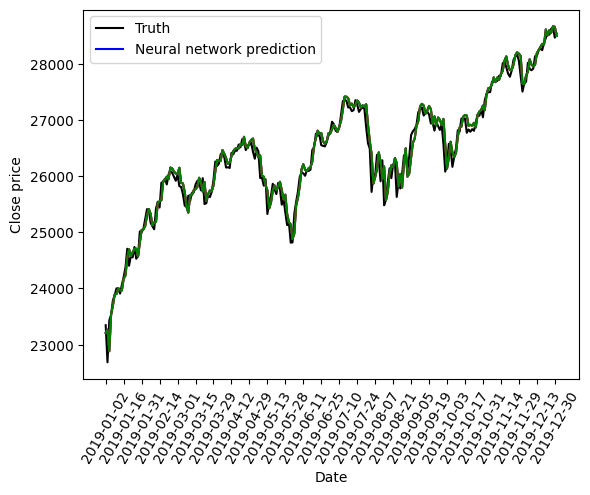

In [125]:
import matplotlib.pyplot as plt
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index, predictions, c='b')
plt.plot(data_test.index, predictions, c='r')
plt.plot(data_test.index, predictions, c='g')
plt.xticks(range(0, 252, 10), rotation=60)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Neural network prediction'])
plt.show()

In this project the model is predicting the daily closing stock price for the year 2019. The data is split into training and testing sets, with the training data covering the period from March 1st, 1988 to December 31st, 2018, and the testing data covering the period from January 1st, 2019 to December 31st, 2019.

Baseline models prediciton of close price for the year 2019

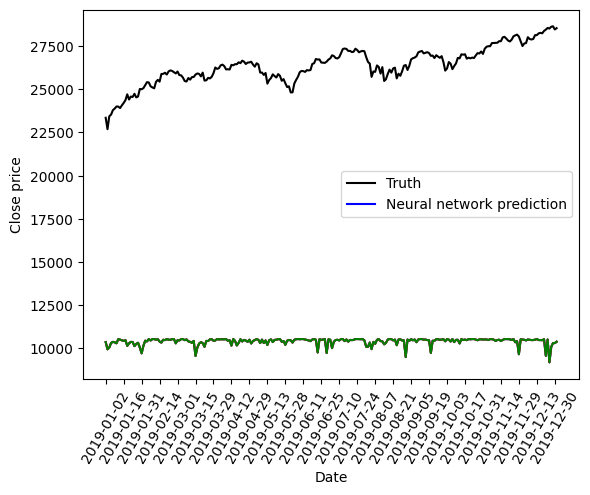

In [126]:
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index, svm_pred, c='b')
plt.plot(data_test.index, svm_pred, c='r')
plt.plot(data_test.index, svm_pred, c='g')
plt.xticks(range(0, 252, 10), rotation=60)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Neural network prediction'])
plt.show()

Results

In [ ]:
From the above results baseline model with svm gives the poor performance when compared with neural network.

SVM results

MSE: 256538460.501

R^2: -220.017

MAE: 15980.579
    
Neural network using sequential model with hyperparameter tuning of model

MSE: 29741.303

R^2: 0.974

MAE: 124.162


Based on the mean squared error (MSE), the SVM model has a higher value than the neural network using sequential model. This indicates that the SVM model has a higher level of error and is less accurate in predicting the output variable.
The R-squared value for the SVM model is also negative, demonstrating that the model performs worse than a straightforward model that forecasts the output variable. The neural network utilizing sequential model, on the other hand, has a high R-squared value of 0.974, indicating that the model is performing extremely well in describing the variability of the output variable.
This shows that the neural network using sequential model is a better performing model compared to the SVM model.